In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
from scipy import stats
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [14]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'bb': cc["blue"], 'anc': cc["green"], 'bn50': cc["red"], 'bn5': cc["orange"], 'A00': cc["purple"],
             "M00": cc["pink"], "iso": cc["brown"], "bleach": "#17BECF",
            "0": "#C7C7C7", "1": "#7F7F7F", "15": "black"}


## I wonder:

  1. How much does the pool size play a role?
  2. 

In [19]:
# read in data to panda
InPath250Pool="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/"
files250P=glob.glob(InPath250Pool+"*pool250_diversity.csv")
InPath500Pool="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/defaultSettings/genome/"
files500P=glob.glob(InPath500Pool+"*genome_diversity.csv")
InPath750Pool="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/"
files750P=glob.glob(InPath750Pool+"*pool750_diversity.csv")

#InPathChr="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/chr/"
#filesChr=glob.glob(InPathChr+"*_chr_diversity.csv")

#outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/output/"
#outPlots = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/O_plots/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
files250P

['/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/UVA_anc_0_3_div_genome_pool250_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/Gent_bb_1_2_div_genome_pool250_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/NIOO_M00_15_5_div_genome_pool250_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/NIOO_M00_1_5_div_genome_pool250_diversity.csv',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/Grenedalf_Sep2024/testSettings/VU_bb_1_2_div_genome_pool250_diversity.

In [20]:
## get the data for pool 250

samNamGen_collect = []
#samNamChr_collect = []

for i in range(0,len(files250P)):
    print(i)
    ## do stuff for the genome data
    g = files250P[i].split('/')
    samGen=g[-1].split('_')
    samNamGen="_".join(samGen[0:4])
    samNamGen_collect.append(samNamGen)
    print(samNamGen)
    df_gen_pre=pd.read_csv(files250P[i],delimiter=",", index_col=False, na_values="na")
    df_gen_pre.drop(['chrom','start','end','total.masked','total.missing','total.numeric'], axis=1, inplace=True)
    df_gen_pre.columns=["emtpy","invariant","passed","missing","numeric","passed","pi","watterson", "tajimasD"]
    df_gen_pre.insert(0, "replicate", samGen[3])
    df_gen_pre.insert(0, "week", samGen[2])
    df_gen_pre.insert(0, "treatment", samGen[1])
    df_gen_pre.insert(0, "institute", samGen[0])
    
    if i==0:
        df_genome = df_gen_pre
    else:
        df_genome = pd.concat([df_genome, df_gen_pre])
    
df_genome.index = samNamGen_collect
df_pool250 = df_genome
#df_chr.index = samNamChr_collect
#df_chr

0
UVA_anc_0_3
1
Gent_bb_1_2
2
NIOO_M00_15_5
3
NIOO_M00_1_5
4
VU_bb_1_2
5
VU_bn5_0_1
6
VU_bb_0_4
7
VU_bn50_0_4
8
Gent_iso_15_2
9
VU_bn50_0_1
10
NIOO_A00_15_5
11
NIOO_bb_1_3
12
VU_bb_1_3
13
RUG_bb_15_4
14
RUG_bb_15_3
15
VU_bn50_15_1
16
NIOO_M00_15_3
17
NIOO_A00_15_2
18
VU_bb_1_5
19
VU_bn50_0_5
20
NIOO_M00_15_1
21
RUG_bb_15_5
22
RUG_bb_1_1
23
NIOO_bb_1_4
24
NIOO_M00_1_1
25
UVA_anc_0_2
26
VU_bb_15_2
27
VU_bn50_15_2
28
RUG_bb_1_2
29
Gent_bb_1_4
30
VU_bb_15_1
31
VU_bb_1_1
32
NIOO_A00_1_1
33
Gent_bb_15_3
34
NIOO_A00_15_3
35
NIOO_A00_1_3
36
VU_bb_0_5
37
Gent_bb_15_1
38
VU_bb_0_2
39
NIOO_M00_15_4
40
NIOO_A00_1_4
41
RUG_bb_1_4
42
NIOO_A00_1_5
43
NIOO_bb_1_1
44
NIOO_bb_15_4
45
NIOO_A00_1_2
46
Gent_bb_15_5
47
VU_bb_15_4
48
VU_bn50_0_3
49
Gent_bb_15_4
50
UVA_anc_0_1
51
Gent_bb_15_2
52
UVA_bb_0_1
53
VU_bb_0_3
54
NIOO_M00_1_3
55
NIOO_M00_1_4
56
Gent_bb_1_1
57
VU_bb_15_3
58
NIOO_A00_15_1
59
NIOO_bb_15_3
60
NIOO_bb_15_1
61
Gent_iso_15_1
62
NIOO_A00_15_4
63
VU_bb_1_4
64
Gent_bb_1_3
65
Gent_iso_15_3
66
R

In [21]:
pd.read_csv(files250P[33],delimiter=",", index_col=False, na_values="na")

,chrom,start,end,total.masked,total.missing,total.empty,total.numeric,total.invariant,total.passed,Gent_bb_15_3_2CE_Q20sort_woDUP.missing,Gent_bb_15_3_2CE_Q20sort_woDUP.numeric,Gent_bb_15_3_2CE_Q20sort_woDUP.passed,Gent_bb_15_3_2CE_Q20sort_woDUP.theta_pi,Gent_bb_15_3_2CE_Q20sort_woDUP.theta_watterson,Gent_bb_15_3_2CE_Q20sort_woDUP.tajimas_d
0,NaN,0,0,0,0,420987,0,91433572,7408192,0,0,7408192,0.005358,0.018553,-6.302209


In [22]:
## get the data for pool 500

samNamGen_collect = []
#samNamChr_collect = []

for i in range(0,len(files500P)):

    ## do stuff for the genome data
    g = files500P[i].split('/')
    samGen=g[-1].split('_')
    samNamGen="_".join(samGen[0:4])
    samNamGen_collect.append(samNamGen)

    df_gen_pre=pd.read_csv(files500P[i],delimiter=",", index_col=False, na_values="na")
    df_gen_pre.drop(['chrom','start','end','total.masked','total.missing','total.numeric'], axis=1, inplace=True)
    df_gen_pre.columns=["emtpy","invariant","passed","missing","numeric","passed","pi","watterson", "tajimasD"]
    df_gen_pre.insert(0, "replicate", samGen[3])
    df_gen_pre.insert(0, "week", samGen[2])
    df_gen_pre.insert(0, "treatment", samGen[1])
    df_gen_pre.insert(0, "institute", samGen[0])
    
    if i==0:
        df_genome = df_gen_pre
    else:
        df_genome = pd.concat([df_genome, df_gen_pre])

df_genome.index = samNamGen_collect
df_pool500 = df_genome
#df_chr.index = samNamChr_collect
#df_chr

In [23]:
## get the data for pool 750

samNamGen_collect = []
#samNamChr_collect = []

for i in range(0,len(files750P)):

    ## do stuff for the genome data
    g = files750P[i].split('/')
    samGen=g[-1].split('_')
    samNamGen="_".join(samGen[0:4])
    samNamGen_collect.append(samNamGen)

    df_gen_pre=pd.read_csv(files750P[i],delimiter=",", index_col=False, na_values="na")
    df_gen_pre.drop(['chrom','start','end','total.masked','total.missing','total.numeric'], axis=1, inplace=True)
    df_gen_pre.columns=["emtpy","invariant","passed","missing","numeric","passed","pi","watterson", "tajimasD"]
    df_gen_pre.insert(0, "replicate", samGen[3])
    df_gen_pre.insert(0, "week", samGen[2])
    df_gen_pre.insert(0, "treatment", samGen[1])
    df_gen_pre.insert(0, "institute", samGen[0])
    
    if i==0:
        df_genome = df_gen_pre
    else:
        df_genome = pd.concat([df_genome, df_gen_pre])

df_genome.index = samNamGen_collect
df_pool750 = df_genome
#df_chr.index = samNamChr_collect
#df_chr

In [39]:
df_joined = df_pool250.join(df_pool500, how="left", rsuffix="_500P")
df_joined_all = df_joined.join(df_pool750, how="left", rsuffix="_750P")
df_joined_all

,institute,treatment,week,replicate,emtpy,invariant,passed,missing,numeric,passed,pi,watterson,tajimasD,institute_500P,treatment_500P,week_500P,replicate_500P,emtpy_500P,invariant_500P,passed_500P,missing_500P,numeric_500P,passed_500P,pi_500P,watterson_500P,tajimasD_500P,institute_750P,treatment_750P,week_750P,replicate_750P,emtpy_750P,invariant_750P,passed_750P,missing_750P,numeric_750P,passed_750P,pi_750P,watterson_750P,tajimasD_750P
UVA_anc_0_3,UVA,anc,0,3,413591,90703023,8163811,0,0,8163811,0.005244,0.019716,-6.504443,UVA,anc,0,3,413591,90703023,8163811,0,0,8163811,0.005243,0.019681,-6.551979,UVA,anc,0,3,413591.0,90703023.0,8163811.0,0.0,0.0,8163811.0,0.005243,0.019673,-6.568048
Gent_bb_1_2,Gent,bb,1,2,352414,95438748,3535720,0,0,3535720,0.003078,0.008517,-5.658688,Gent,bb,1,2,352414,95438748,3535720,0,0,3535720,0.003078,0.008497,-5.696441,Gent,bb,1,2,352414.0,95438748.0,3535720.0,0.0,0.0,3535720.0,0.003077,0.008492,-5.709348
NIOO_M00_15_5,NIOO,M00,15,5,466277,93828271,4828684,0,0,4828684,0.002975,0.011178,-6.502596,NIOO,M00,15,5,466277,93828271,4828684,0,0,4828684,0.002975,0.011145,-6.547441,NIOO,M00,15,5,466277.0,93828271.0,4828684.0,0.0,0.0,4828684.0,0.002974,0.011137,-6.562815
NIOO_M00_1_5,NIOO,M00,1,5,12267163,84485634,279594,0,0,279594,0.001835,0.001978,-0.638171,NIOO,M00,1,5,12267163,84485634,279594,0,0,279594,0.001835,0.001977,-0.640044,NIOO,M00,1,5,12267163.0,84485634.0,279594.0,0.0,0.0,279594.0,0.001835,0.001976,-0.640854
VU_bb_1_2,VU,bb,1,2,296765,92930590,6161411,0,0,6161411,0.003528,0.013571,-6.557981,VU,bb,1,2,296765,92930590,6161411,0,0,6161411,0.003526,0.013520,-6.601708,VU,bb,1,2,296765.0,92930590.0,6161411.0,0.0,0.0,6161411.0,0.003526,0.013509,-6.616933
VU_bn5_0_1,VU,bn5,0,1,401097,96467716,2422506,0,0,2422506,0.002785,0.006211,-4.888723,VU,bn5,0,1,401097,96467716,2422506,0,0,2422506,0.002784,0.006199,-4.919664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VU_bb_0_4,VU,bb,0,4,408896,89072201,9827134,0,0,9827134,0.006046,0.023716,-6.602178,VU,bb,0,4,408896,89072201,9827134,0,0,9827134,0.006045,0.023676,-6.650839,VU,bb,0,4,408896.0,89072201.0,9827134.0,0.0,0.0,9827134.0,0.006045,0.023667,-6.667294
VU_bn50_0_4,VU,bn50,0,4,351074,95283496,3679861,0,0,3679861,0.003183,0.008960,-5.713734,VU,bn50,0,4,351074,95283496,3679861,0,0,3679861,0.003182,0.008942,-5.752947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gent_iso_15_2,Gent,iso,15,2,486576,93038911,5643709,0,0,5643709,0.004977,0.014952,-5.911970,Gent,iso,15,2,486576,93038911,5643709,0,0,5643709,0.004976,0.014935,-5.955537,Gent,iso,15,2,486576.0,93038911.0,5643709.0,0.0,0.0,5643709.0,0.004976,0.014931,-5.970150
VU_bn50_0_1,VU,bn50,0,1,336541,95297167,3694106,0,0,3694106,0.003060,0.008738,-5.758413,VU,bn50,0,1,336541,95297167,3694106,0,0,3694106,0.003059,0.008716,-5.796470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='pi_500P', ylabel='pi_750P'>

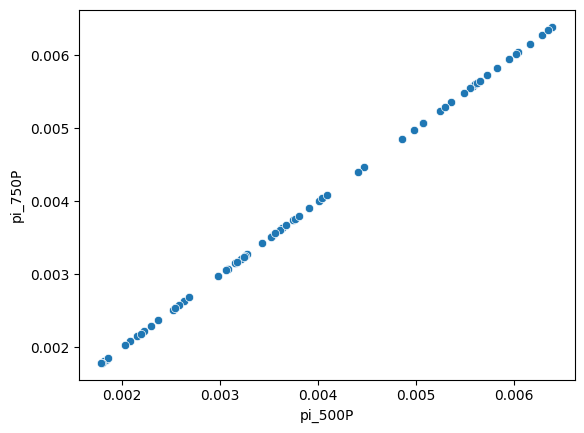

In [43]:
sns.scatterplot(data=df_joined_all, x="pi_500P", y="pi_750P")